In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os


In [3]:
# Set path for data source
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/SGAN/")

Mounted at /content/gdrive


In [8]:
sgan = pd.read_csv('/content/gdrive/My Drive/SGAN/sgan.csv')
sgan

,Sample_Size,SGAN_Accuracy,SGAN_F1_Score_Macro
0,100,0.833703,0.710306
1,200,0.858093,0.781487
2,300,0.869180,0.806033
3,400,0.911308,0.844239
4,500,0.917960,0.866668
5,600,0.886918,0.821973
6,700,0.886918,0.827959
7,800,0.898004,0.812181
8,900,0.917960,0.863425
9,1000,0.911308,0.848342


In [5]:
baseline = pd.read_csv('/content/gdrive/My Drive/SGAN/baseline.csv')
baseline

,Sample_Size,FCN_Accuracy,1D_CNN_Accuracy,2D_CNN_Accuracy,Label_Spreading_Accuracy,Label_Propagation_Accuracy,FCN_F1_Score_Macro,1D_CNN_F1_Score_Macro,2D_CNN_F1_Score_Macro,Label_Spreading_F1_Score_Macro,Label_Propagation_F1_Score_Macro
0,100,0.753880,0.665188,0.492239,0.609756,0.603104,0.611453,0.460999,0.315365,0.344430,0.304468
1,200,0.818182,0.696231,0.718404,0.634146,0.678492,0.740699,0.523010,0.584972,0.359670,0.463153
2,300,0.849224,0.716186,0.858093,0.764967,0.780488,0.747676,0.550590,0.782687,0.572030,0.584288
3,400,0.847007,0.745011,0.873614,0.784922,0.798226,0.750730,0.581885,0.789608,0.582543,0.619708
4,500,0.866962,0.740577,0.860310,0.791574,0.800443,0.815597,0.555790,0.792250,0.606976,0.630192
5,600,0.851441,0.731707,0.849224,0.811530,0.811530,0.771138,0.534778,0.776125,0.646129,0.656643
6,700,0.882483,0.780488,0.891353,0.804878,0.811530,0.829453,0.612808,0.833060,0.650127,0.666409
7,800,0.873614,0.800443,0.904656,0.807095,0.807095,0.777163,0.657545,0.854527,0.639878,0.661789
8,900,0.880266,0.807095,0.906874,0.800443,0.804878,0.814872,0.674431,0.861715,0.633843,0.665107
9,1000,0.898004,0.764967,0.893570,0.796009,0.804878,0.846337,0.624341,0.845974,0.628881,0.665680


In [20]:
merged_data = pd.concat([sgan,baseline.drop('Sample_Size',axis=1)],axis=1).set_index('Sample_Size')
merged_data

,SGAN_Accuracy,SGAN_F1_Score_Macro,FCN_Accuracy,1D_CNN_Accuracy,2D_CNN_Accuracy,Label_Spreading_Accuracy,Label_Propagation_Accuracy,FCN_F1_Score_Macro,1D_CNN_F1_Score_Macro,2D_CNN_F1_Score_Macro,Label_Spreading_F1_Score_Macro,Label_Propagation_F1_Score_Macro
Sample_Size,,,,,,,,,,,,
100,0.833703,0.710306,0.753880,0.665188,0.492239,0.609756,0.603104,0.611453,0.460999,0.315365,0.344430,0.304468
200,0.858093,0.781487,0.818182,0.696231,0.718404,0.634146,0.678492,0.740699,0.523010,0.584972,0.359670,0.463153
300,0.869180,0.806033,0.849224,0.716186,0.858093,0.764967,0.780488,0.747676,0.550590,0.782687,0.572030,0.584288
400,0.911308,0.844239,0.847007,0.745011,0.873614,0.784922,0.798226,0.750730,0.581885,0.789608,0.582543,0.619708
500,0.917960,0.866668,0.866962,0.740577,0.860310,0.791574,0.800443,0.815597,0.555790,0.792250,0.606976,0.630192
600,0.886918,0.821973,0.851441,0.731707,0.849224,0.811530,0.811530,0.771138,0.534778,0.776125,0.646129,0.656643
700,0.886918,0.827959,0.882483,0.780488,0.891353,0.804878,0.811530,0.829453,0.612808,0.833060,0.650127,0.666409
800,0.898004,0.812181,0.873614,0.800443,0.904656,0.807095,0.807095,0.777163,0.657545,0.854527,0.639878,0.661789
900,0.917960,0.863425,0.880266,0.807095,0.906874,0.800443,0.804878,0.814872,0.674431,0.861715,0.633843,0.665107


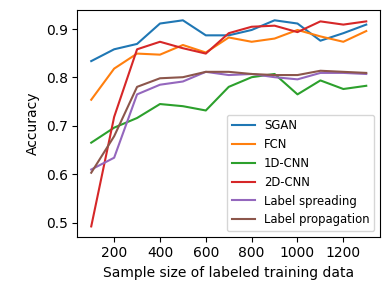

Plot saved to /content/gdrive/My Drive/SGAN/acc_lineplot.jpg


In [54]:
df_plot = merged_data.loc[:, merged_data.columns.str.contains('Accuracy')]
df_plot.columns = ['SGAN', 'FCN', '1D-CNN', '2D-CNN', 'Label spreading', 'Label propagation']
ax = df_plot.plot(figsize=(4.,3.))
plt.xlabel('Sample size of labeled training data')
plt.ylabel('\nAccuracy')
ax.legend(fontsize='small')
plt.tight_layout()

# Saving the plot with 300 DPI
save_path = '/content/gdrive/My Drive/SGAN/acc_lineplot.jpg'
plt.savefig(save_path, dpi=300)

# Displaying the plot (optional)
plt.show()

print(f"Plot saved to {save_path}")

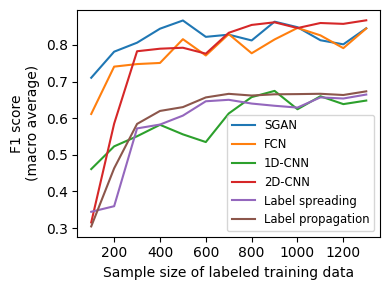

Plot saved to /content/gdrive/My Drive/SGAN/f1_score_lineplot.jpg


In [55]:
df_plot = merged_data.loc[:, merged_data.columns.str.contains('F1_Score')]
df_plot.columns = ['SGAN', 'FCN', '1D-CNN', '2D-CNN', 'Label spreading', 'Label propagation']
ax = df_plot.plot(figsize=(4.,3.))
plt.xlabel('Sample size of labeled training data')
plt.ylabel('F1 score\n(macro average)')
ax.legend(fontsize='small')
plt.tight_layout()

# Saving the plot with 300 DPI
save_path = '/content/gdrive/My Drive/SGAN/f1_score_lineplot.jpg'
plt.savefig(save_path, dpi=300)

# Displaying the plot (optional)
plt.show()

print(f"Plot saved to {save_path}")